# 1. word2vec

In [ ]:
!pip install gensim


In [8]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/ftgog/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/ftgog/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [10]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [11]:
 from gensim.models.word2vec import Word2Vec

### Word2Vec 함수를 이용하여 학습수행

In [12]:
model = Word2Vec(sentences)
#model = Word2Vec(sentences, size=30, window = 2, min_count=10, workers=4, iter=100, sg=1)

### 학습후 init_sims 명령으로 필요없는 메모리를 unloading

In [13]:
model.init_sims(replace=True)

### 단어간 유사도 계산

In [14]:
model.wv.similarity('actor', 'actress')

0.8874977

In [15]:
model.wv.similarity('he', 'she')

0.8395214

In [16]:
model.wv.similarity('actor', 'she')

0.2649402

### 특정단어와 가장 유사한 단어 선택

In [17]:
model.wv.most_similar("accident")

[('museum', 0.8644222021102905),
 ('radio', 0.8547863960266113),
 ('bus', 0.850704550743103),
 ('church', 0.8438239693641663),
 ('operation', 0.842745304107666),
 ('building', 0.8425543308258057),
 ('apartment', 0.8412788510322571),
 ('boat', 0.8411229848861694),
 ('bomb', 0.8407930135726929),
 ('jeep', 0.8336044549942017)]

### she + (actor - actress) = he

In [18]:
model.wv.most_similar(positive=['she', 'actor'], negative='actress', topn=1)

[('he', 0.2893315553665161)]

# 2.자연어 처리

In [19]:
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [20]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [21]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")

### 토큰생성

In [22]:
# 문장단위로 분할
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [23]:
# 단어단위로 분할 
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [24]:
# 표현식 단위로 분할  
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

### 형태소 분석

#### 어간 추출(stemming)


In [25]:
regtoken_emma = retokenize.tokenize(emma_raw)
# 어간추출
from nltk.stem import LancasterStemmer
st = LancasterStemmer()
[st.stem(w) for w in regtoken_emma]

['emm',
 'by',
 'jan',
 'aust',
 '1816',
 'volum',
 'i',
 'chapt',
 'i',
 'emm',
 'woodh',
 'handsom',
 'clev',
 'and',
 'rich',
 'with',
 'a',
 'comfort',
 'hom',
 'and',
 'happy',
 'disposit',
 'seem',
 'to',
 'unit',
 'som',
 'of',
 'the',
 'best',
 'bless',
 'of',
 'ex',
 'and',
 'had',
 'liv',
 'near',
 'twenty',
 'on',
 'year',
 'in',
 'the',
 'world',
 'with',
 'very',
 'littl',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daught',
 'of',
 'a',
 'most',
 'affect',
 'indulg',
 'fath',
 'and',
 'had',
 'in',
 'consequ',
 'of',
 'her',
 'sist',
 's',
 'marry',
 'been',
 'mistress',
 'of',
 'his',
 'hous',
 'from',
 'a',
 'very',
 'ear',
 'period',
 'her',
 'moth',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'hav',
 'mor',
 'than',
 'an',
 'indistinct',
 'remembr',
 'of',
 'her',
 'caress',
 'and',
 'her',
 'plac',
 'had',
 'been',
 'supply',
 'by',
 'an',
 'excel',
 'wom',
 'as',
 'gov',
 'who',
 'had

#### 원형 복원(lemmatizing)

In [26]:
# 원형복원 : 사전형으로 통일
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
lemma_emma = [lm.lemmatize(w) for w in regtoken_emma]
print(lemma_emma)

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessing', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'year', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'wa', 'the', 'youngest', 'of', 'the', 'two', 'daughter', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caress', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'a', 'governess', 'who', 'had', 'fallen', 'little', 'sh

### POS Tagging

In [27]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

### 단어 빈도 분석

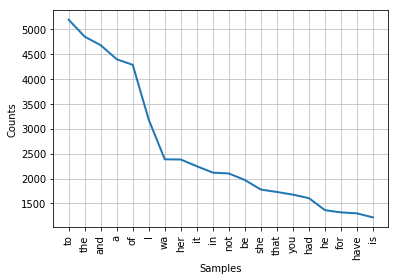

In [28]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(lemma_emma, name="Emma")
text.plot(20)
plt.show()

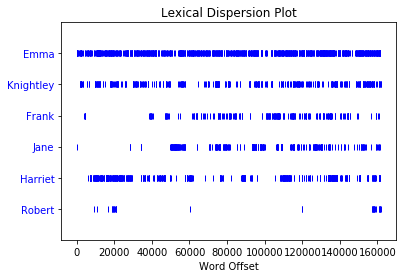

In [29]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [30]:
from nltk import FreqDist
from nltk.tag import pos_tag

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

### 워드클라우드

In [81]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/be/fe/4e718808c7bfb641e8964c2e40a6ae2a51c74ea493a6701b89ba417bc769/wordcloud-1.5.0-cp37-cp37m-manylinux1_x86_64.whl
  The script wordcloud_cli is installed in '/home/ftgog/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


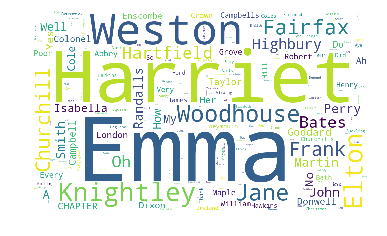

In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

# 3. 한국어 단어 임베딩

### 네이버 영화 감상 코퍼스를 사용하여 한국어 단어 임베딩

In [1]:
!wget - nc https: // raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

--2019-05-29 11:36:42--  http://-/
Resolving - (-)... failed: Name or service not known.
wget: unable to resolve host address ‘-’
--2019-05-29 11:36:42--  http://nc/
Resolving nc (nc)... failed: Name or service not known.
wget: unable to resolve host address ‘nc’
--2019-05-29 11:36:42--  ftp://https/
           => ‘.listing’
Resolving https (https)... failed: Name or service not known.
wget: unable to resolve host address ‘https’
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2019-05-29 11:36:42--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt.3’

ratings_train.txt.3 100%[===================>]  13.95M  2.25MB/s    in 6.4s    

2019-05-29 11:36:49 (2.1

In [2]:
import codecs

def read_data(filename):
    with codecs.open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data


train_data = read_data('ratings_train.txt')

In [3]:
!pip3 install konlpy

  Using cached https://files.pythonhosted.org/packages/e5/3d/4e983cd98d87b50b2ab0387d73fa946f745aa8164e8888a714d5129f9765/konlpy-0.5.1-py2.py3-none-any.whl


In [4]:
from konlpy.tag import Twitter
tagger = Twitter()


def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]


train_docs = [row[1] for row in train_data]

/home/dslab/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
sentences = [tokenize(d) for d in train_docs]

In [6]:
from gensim.models import word2vec

In [7]:
% % time

model = word2vec.Word2Vec(sentences)
model.init_sims(replace=True)

UsageError: Line magic function `%` not found.


In [ ]:
model.wv.similarity(*tokenize(u'배우 여배우'))

In [ ]:
model.wv.similarity(*tokenize(u'배우 남자'))

In [ ]:
from konlpy.utils import pprint
pprint(model.wv.most_similar(positive=tokenize(
    u'남자 여배우'), negative=tokenize(u'배우'), topn=1))